<a href="https://colab.research.google.com/github/Hbrand03/Intro_to_ML_Work/blob/main/Homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training with X1
Final model for X1: Y = 5.2929472827573 + -1.7911907900332469 * X1
Final cost for X1: 1.0364360799429273


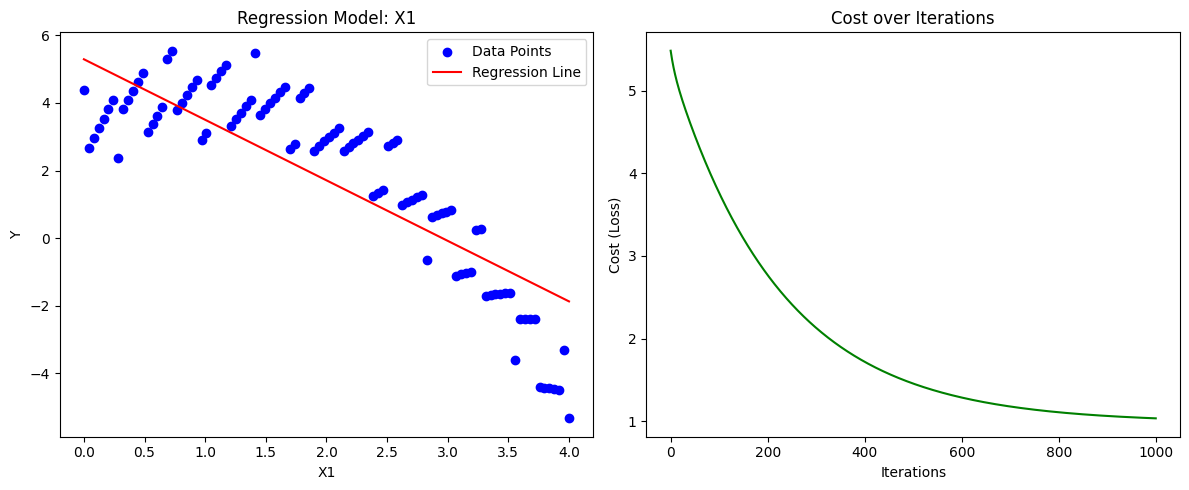


Training with X2
Final model for X2: Y = 0.687019946445204 + 0.5766946227869244 * X2
Final cost for X2: 3.5996728289711006


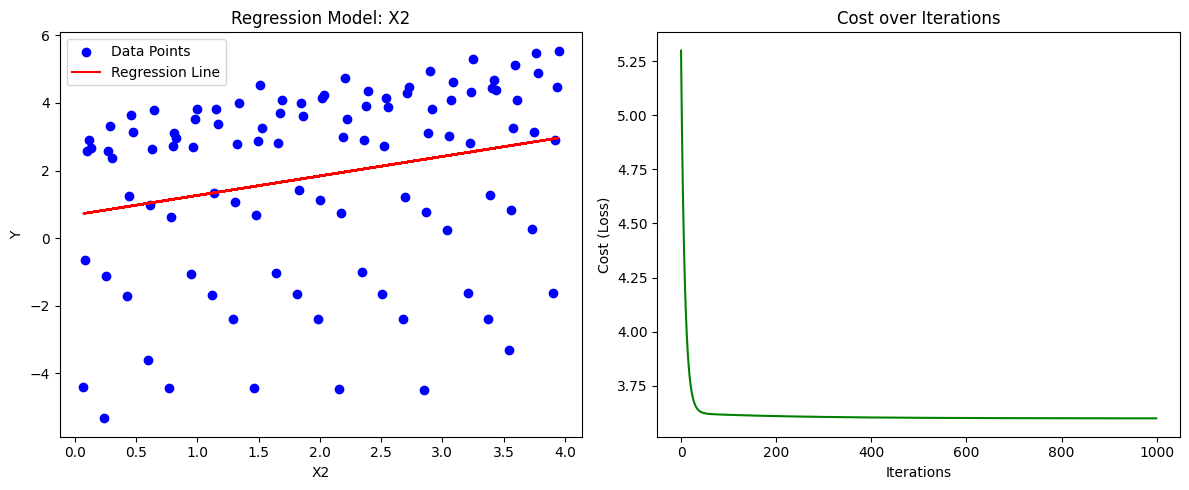


Training with X3
Final model for X3: Y = 2.5911866396661667 + -0.4096513504177302 * X3
Final cost for X3: 3.6396602056308045


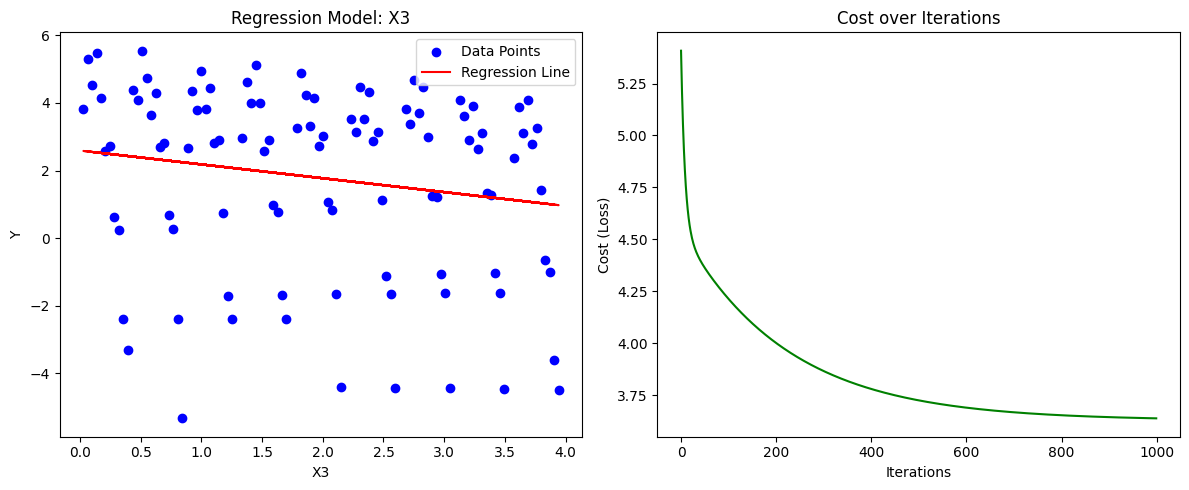

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/D3.csv'
data = pd.read_csv(url)

# Extract X1, X2, X3, and Y
X1 = data['X1'].values
X2 = data['X2'].values
X3 = data['X3'].values
Y = data['Y'].values

# Add a column of ones to X for the intercept term (theta_0)
def add_intercept(X):
    return np.c_[np.ones(X.shape[0]), X]

# Define the cost function
def compute_cost(X, Y, theta):
    m = len(Y)
    h = X.dot(theta)
    return (1 / (2 * m)) * np.sum((h - Y) ** 2)

# Gradient Descent Algorithm
def gradient_descent(X, Y, theta, alpha, iterations):
    m = len(Y)
    cost_history = []

    for i in range(iterations):
        h = X.dot(theta)
        theta -= (alpha / m) * X.T.dot(h - Y)
        cost_history.append(compute_cost(X, Y, theta))

    return theta, cost_history

# Plot regression and cost history
def plot_results(X, Y, theta, cost_history, variable_name):
    plt.figure(figsize=(12, 5))

    # Plot regression line
    plt.subplot(1, 2, 1)
    plt.scatter(X[:, 1], Y, color='blue', label='Data Points')
    plt.plot(X[:, 1], X.dot(theta), color='red', label='Regression Line')
    plt.title(f'Regression Model: {variable_name}')
    plt.xlabel(variable_name)
    plt.ylabel('Y')
    plt.legend()

    # Plot loss over iterations
    plt.subplot(1, 2, 2)
    plt.plot(range(len(cost_history)), cost_history, color='green')
    plt.title('Cost over Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Cost (Loss)')

    plt.tight_layout()
    plt.show()

# Run gradient descent for a single variable
def train_for_variable(X, Y, variable_name, alpha=0.01, iterations=1000):
    X_intercept = add_intercept(X.reshape(-1, 1))
    theta = np.zeros(X_intercept.shape[1])

    # Perform gradient descent
    theta, cost_history = gradient_descent(X_intercept, Y, theta, alpha, iterations)

    # Report the final model and plot
    print(f'Final model for {variable_name}: Y = {theta[0]} + {theta[1]} * {variable_name}')
    print(f'Final cost for {variable_name}: {cost_history[-1]}')

    plot_results(X_intercept, Y, theta, cost_history, variable_name)

# Train for each variable with a learning rate of 0.01 and 1000 iterations
print("Training with X1")
train_for_variable(X1, Y, 'X1', alpha=0.01, iterations=1000)

print("\nTraining with X2")
train_for_variable(X2, Y, 'X2', alpha=0.01, iterations=1000)

print("\nTraining with X3")
train_for_variable(X3, Y, 'X3', alpha=0.01, iterations=1000)
